# Functional analysis of post-translationally modified protein complexes

We will analyze the quantitative behavior of protein complexes with respect to the post-translational modifications of 
their proteins. This allows identifying different functional behavior of different proteoforms and complex composition directed by signalling events in the differentiating cells.

Quantitative proteomics data usually comes from bottom-up LC-MS (liquid chromatography mass spectrometry) experiments, where the proteins are digested into peptides prior to data acquisition. This means that we have to go from the peptide to the protein level.

As data example, you will use the experimental data from an investigation of molecular signaling networks activated during muscle formation by Christina Erika Hagensen et. al (unpublished study). The study is started with human satellite cells. These are resting muscle cells, that can be activated and developed into mature muscle cells e.g. when muscles are damaged. When activated, the satellite cells divide and produce myoblasts that futher proliferate and fuse into myotubes which later mature into myofibers. This process is driven by signalling events leading to the necessary changes in  the transcriptional programme, cell behavior and morphology. 

The samples were measured in triplicates for each of the 6 times points as given in the following picture.

![Muscle time study](Muscle_Time_study.JPG)


### General instructions

You will go through the different cells of the workflow below. Execute the cells by pressing "shift-enter" or clicking on the triangle on the top.

For giving the answers to the questions below, double-click on the Jupyter cell, and add them at the given position.

👨‍💻 Start with running the following cell (only once)

In [1]:
# Some preparations like installing and loading libraries. Run only once
#install.packages(c("gplots", "lattice"))
library(gplots)
library(lattice)
options(repr.plot.width=12, repr.plot.height=8)



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




### Load basic data structure

👨‍💻 Load the expression profiles of complexes, proteins and modified peptides (phosphorylations and acetylations). 

This data structure is the result of a full data analysis workflow to extract the quantitative changes from hundreds of thousands of mass spectra, each of them providing information about a specific peptide. 

Protein and complex expression changes were calculated by summarizing expression changes of unmodified peptides.


In [2]:
complexes <- readRDS("complex_structure.RData")



#### Protein complexes 

The data is arranged into known protein complexes from the CORUM data base (https://mips.helmholtz-muenchen.de/corum/). Proteins not forming a complex are not considered here.


In [3]:
length(complexes)


[1] 1619

#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>What is a protein complex and why are they important? Given an example for a complex. </ins>

_Answer_

##### ❔ Question II:  <ins>How many human complexes are annotated in the CORUM database? How many are given in the data structure?</ins>

_Answer_




### Selecting an example protein complex

💡 You can check for different names that match a pattern like "olyco" or paste a complex name from the list given in the last cell in this notebook. 

👨‍💻 Let's take the "Polycomb repressive complex" (PRC1). It catalyses monoubiquitination 
of histone H2A on Lys119, promoting gene silencing. 

We expect it to change during differentiation as the transcriptional programme is broadly affected. 


In [4]:
grep("olycom", names(complexes),value=T)
cname <- "Polycomb repressive complex"


[1] "Polycomb repressive complex 1 (PRC1, hPRC-H)"
[2] "Polycomb repressive complex 2 (PRC2)"        
[3] "Polycomb repressive complex 4 (PRC4)"        
[4] "EED-EZH-YY1 polycomb complex"                
[5] "Polycomb repressive complex"                 
[6] "EED-EZH polycomb complex"

#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>Why are there massive changes in gene transcription during cell differentiation?</ins>

_Answer_

##### ❔ Question II:  <ins>Any idea why there are different forms of the same complex?</ins>

_Answer_




### Workflow for visual complex analysis

#### Step 1: available information

👨‍💻 Get an idea of the available protein and peptide expressions of this complex


In [5]:
PComplex <- complexes[cname][[1]]
names(PComplex)

#Protein subunits of the complex
PComplex$Composition
# number of peptides per subunit
names(PComplex$PTMs_Raw) <- PComplex$Composition
lapply(PComplex$PTMs_Raw, nrow)


[1] "Composition" "PTMs"        "PTMs_Sign"   "PTMs_Raw"    "Proteins"   
[6] "Complex"

[1] "O00257" "P35226" "P78364" "Q06587"

$O00257
[1] 3

$P35226
[1] 2

$P78364
NULL

$Q06587
[1] 4

#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>How many proteins does this complex contain?</ins>

_Answer_

##### ❔ Question II:  <ins>What does a code like "P78364" denote? Where do you get more information about this?</ins>

_Answer_

##### ❔ Question III:  <ins>How many proteins of the complex were found in the experiment?</ins>

_Answer_




#### Step 2: Protein analysis

👨‍💻 Extract the protein expression patterns and average them over the three replicates.

Protein expressions are calculated from the quantitative behavior of their non-modified peptides. This procedure is call protein inference (for finding the contributing peptides) and protein summarization (for extracting the protein changes from the individual changes in peptide expression).



In [6]:
Prots <- PComplex$Proteins[,2:ncol(PComplex$Proteins)]
rownames(Prots) <- PComplex$Proteins[,1]
avProts <- NULL
for(i in 1:6) avProts <- cbind(avProts,rowMeans(Prots[,(i-1)*3+1:3], na.rm=T))
avComplex <- sapply(1:6, function(i) mean(PComplex$Complex[(i-1)*3+1:3], na.rm=T))


👨‍💻 Visualize all replicated values and their averages for the proteins of the complex.



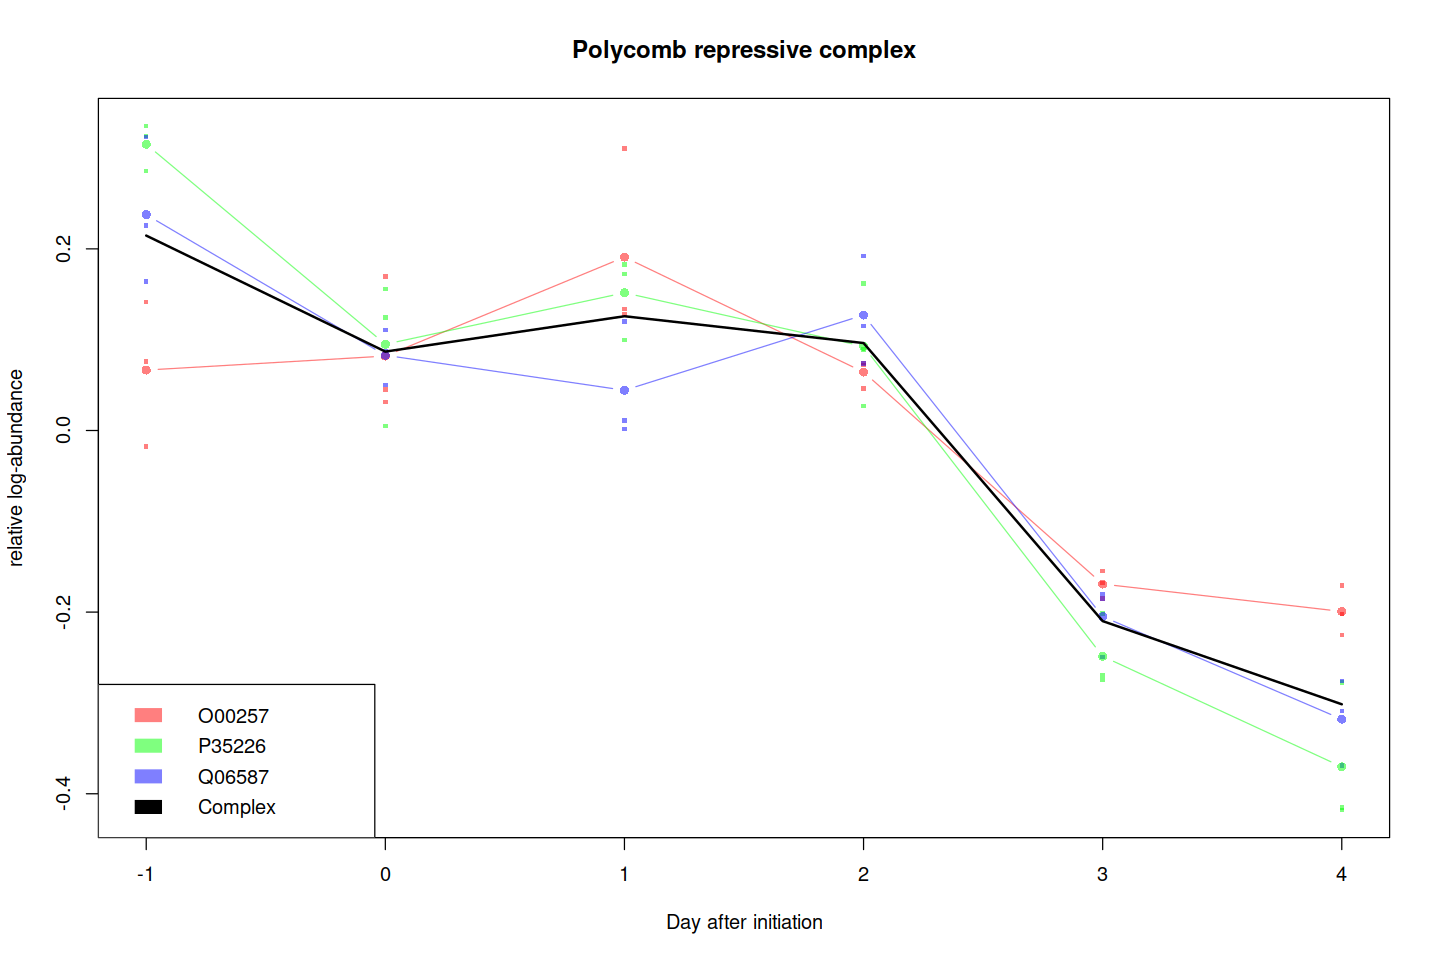

In [7]:
cols <- rainbow(nrow(Prots), alpha = 0.5)
plot(rep(-1:4, each=3), t(Prots[1,]), xaxt="n", xlab="Day after initiation", ylab="relative log-abundance", 
     pch=15, col=cols[1], cex=0.5, ylim=range(Prots, na.rm=T), main=cname)
axis(1, at = -1:4, labels=-1:4)
for (i in 2:nrow(Prots)) {
    points(rep(-1:4, each=3), t(Prots[i,]), pch=15, col=cols[i], cex=0.5)
}
for (i in 1:nrow(avProts)) {
    points(-1:4, t(avProts[i,]), pch=16, col=cols[i], cex=1, type="b")
}
lines(-1:4, avComplex, lwd=2)
legend("bottomleft", legend = c(rownames(Prots), "Complex"), fill=c(cols,"#000000"), border=0,cex=1)


👨‍💻 Alternatively, plot the average profiles using the `heatmap` function to cluster the proteins
according to similarities in their expression profiles

This does not make much sense for only 3 proteins but is more insightful for larger complexes.


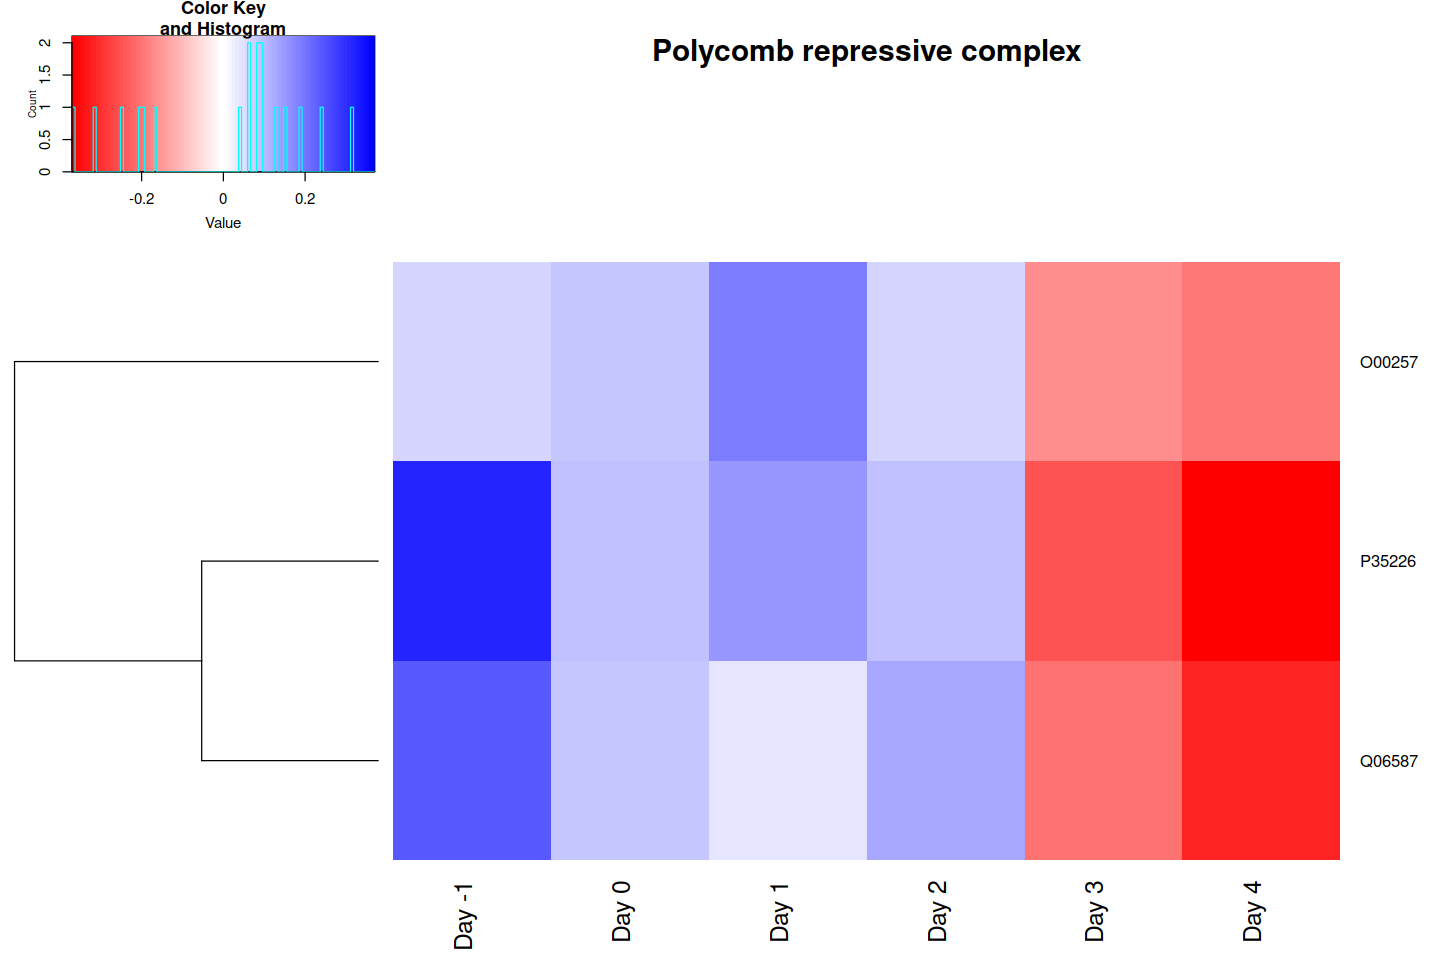

In [8]:
tmax <- max(abs(avProts), na.rm=T)
heatmap.2(as.matrix(avProts), scale="none", labCol = paste("Day", -1:4), main=cname,
          breaks = seq(-tmax, tmax, length=101),cexRow = 1,
          col=redblue(100), trace="none", dendrogram = "row", Colv = "none")



#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>What general trend do you observe?</ins>

_Answer_

##### ❔ Question II:  <ins>Do you think the proteins of the complex have other roles in the cell than forming the complex?</ins>

_Answer_




#### Step 3: PTM analysis

👨‍💻 Extract the modified peptides of the proteins and average them over replicates.

They can show vastly different behavior and often provide information about regulated, different protein and complex functions


In [9]:
# Get the peptide table and average over replicates
ModPeps <- NULL
for (peps in PComplex$PTMs_Raw) {
  ModPeps <- rbind(ModPeps, peps)
}
avModPeps <- NULL
  for(i in 1:6) avModPeps <- cbind(avModPeps,rowMeans(ModPeps[,3+(i-1)*3+1:3], na.rm=T))
rownames(avModPeps) <- ModPeps[,1]


👨‍💻 Again, plot the expression profiles of both replicates and averages.



[1] "O00257" "P35226" "Q06587"


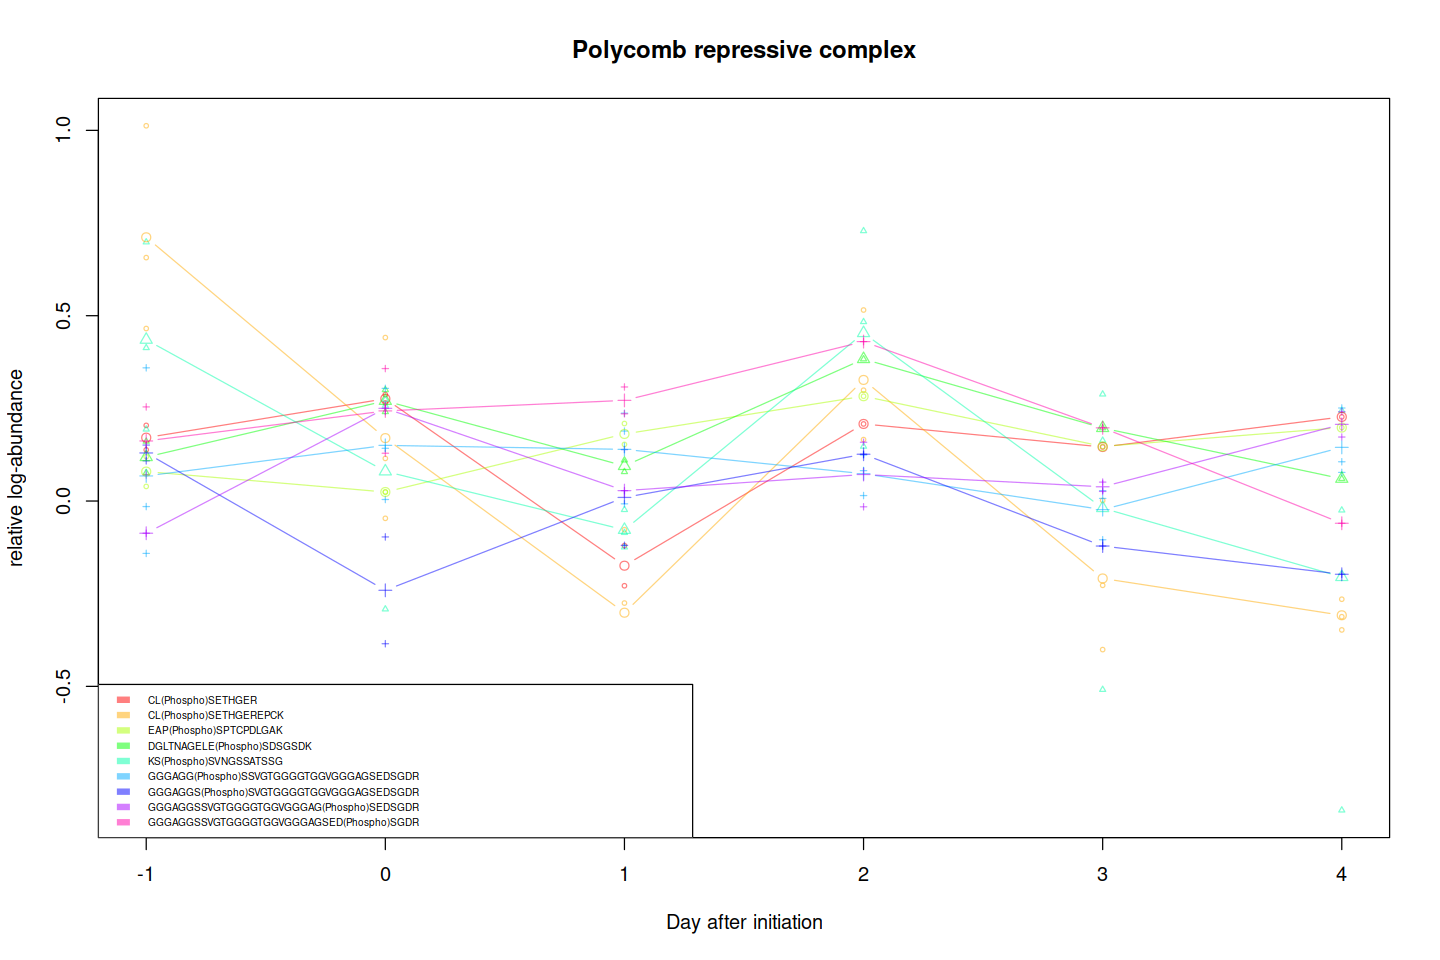

In [10]:
cols <- rainbow(nrow(ModPeps), alpha = 0.5)
prots <- names(table(ModPeps[,3]))
print(prots)
plot(rep(-1:4, each=3), t(ModPeps[1,4:ncol(ModPeps)]), xaxt="n", xlab="Day after initiation", ylab="relative log-abundance", 
     pch=1, col=cols[1], cex=0.5, ylim=range(ModPeps[,4:ncol(ModPeps)], na.rm=T), main=cname)
axis(1, at = -1:4, labels=-1:4)
for (i in 2:nrow(ModPeps)) {
    points(rep(-1:4, each=3), t(ModPeps[i,4:ncol(ModPeps)]), pch=which(prots == ModPeps[i,3]), col=cols[i], cex=0.5)
}
for (i in 1:nrow(avModPeps)) {
    points(-1:4, t(avModPeps[i,]), pch=which(prots == ModPeps[i,3]), col=cols[i], cex=1, type="b")
}
legend("bottomleft", legend = c(ModPeps[,1]), fill=c(cols), cex=0.5, border=0)


Given the large number of peptides, this becomes very fast very messy. 

👨‍💻 Use hierarchical clustering that helps by ordering
the peptides according to their quantitative behavior


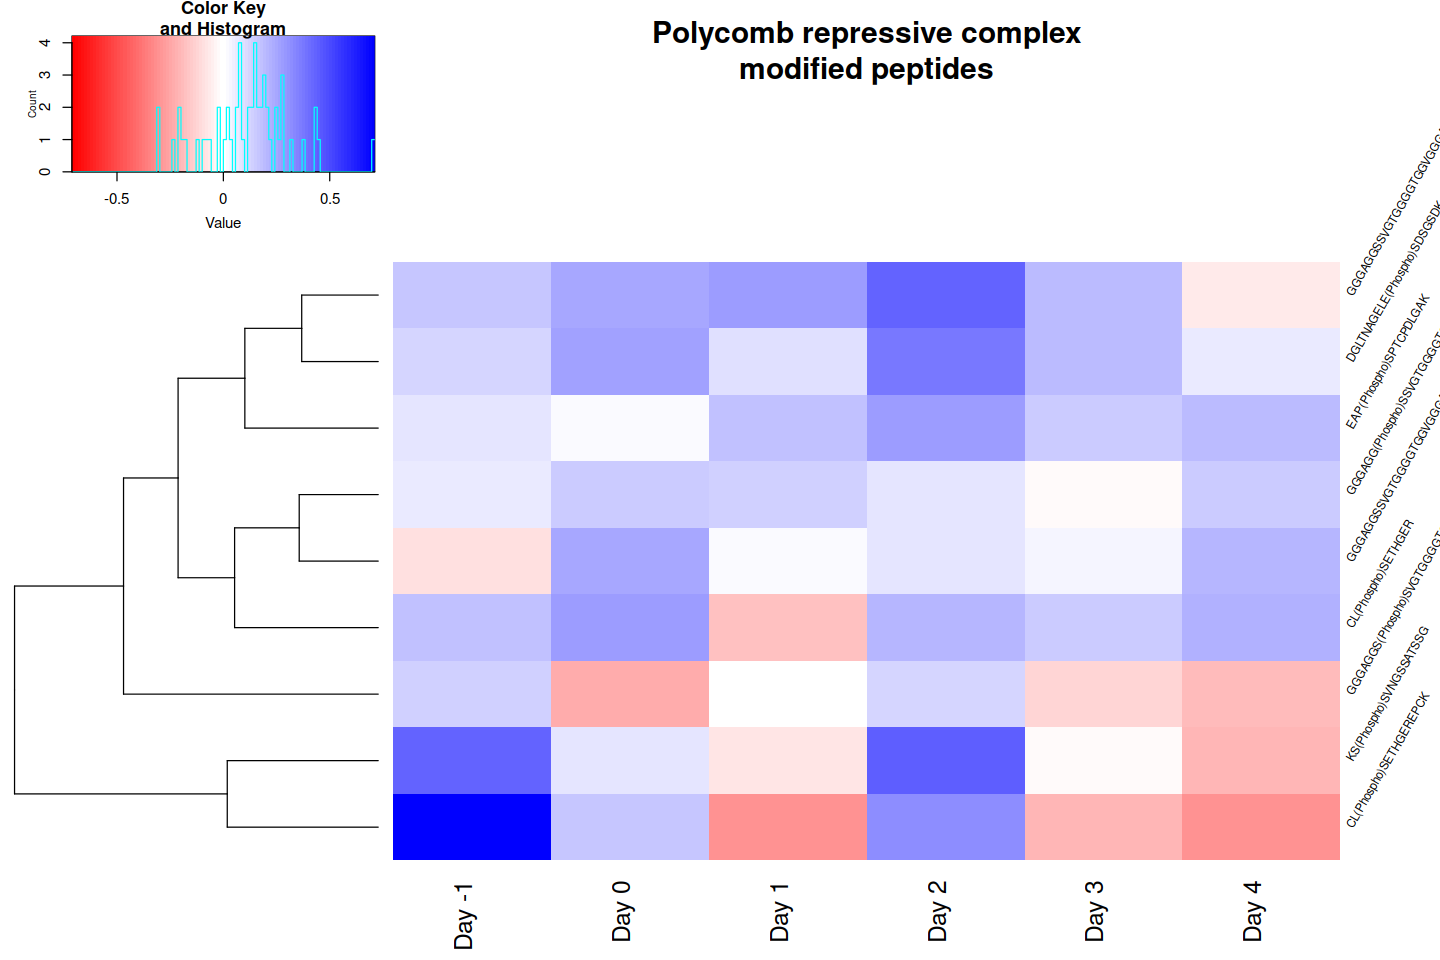

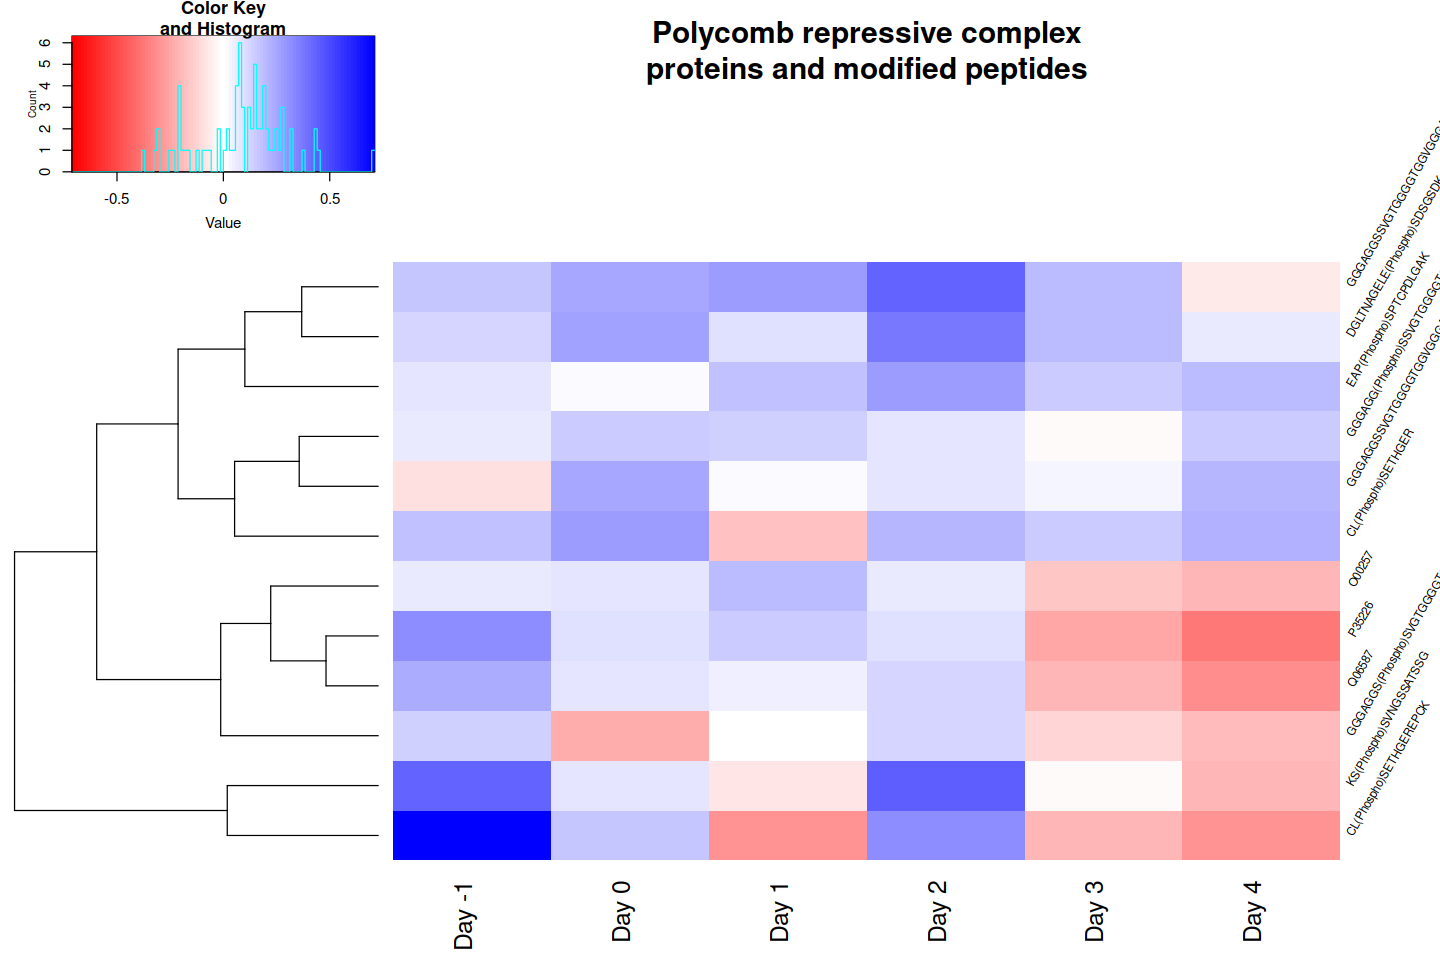

In [11]:
tmax <- max(abs(avModPeps), na.rm=T)
heatmap.2(as.matrix(avModPeps),dendrogram="row", scale="none", main=paste0(cname,"\nmodified peptides"), labRow = ModPeps[,1], 
          labCol=paste("Day",-1:4), offsetRow=-0.6, srtRow=60, Colv = "none",
          cexRow = 0.7, trace = "none", breaks=seq(-tmax, tmax, length=101), col = redblue(100))

heatmap.2(as.matrix(rbind(avModPeps,avProts)), dendrogram="row", scale="none", cexRow = 0.7, 
          trace = "none", breaks=seq(-tmax, tmax, length=101), col = redblue(100),Colv = "none",
          labCol = paste("Day", -1:4), main=paste0(cname, "\nproteins and modified peptides"), offsetRow=-0.6, srtRow=60,)


#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>What are the main trends? How do the proteins behave in comparison to modified peptides? </ins>

_Answer_

##### ❔ Question II:  <ins>Modified peptide measurements are much more variant. Why would that be? Think about both biological and technical reasons.</ins>

_Answer_

##### ❔ Question III:  <ins>There is one particular peptide coming in different forms. Which is it and what could that mean?</ins>

_Answer_




When it comes to larger complexes with more than 10 proteins and plenty of PTMs on their subunits, the visualizations above are not very informative. We can use pairwise correlations to get a better idea of co-regulations between proteins and modified peptides

👨‍💻 Create a correlation matrix and plot it with the `heatmap` function.

The following plot contains many details, so take you time to understand the different components. As each of the modified peptides corresponds to one of the protein subunits, this relation is given both as color and in the labels. 


                                                [,1]        [,2]         [,3]
CL(Phospho)SETHGER                        0.17105069  0.27591546 -0.174436209
CL(Phospho)SETHGEREPCK                    0.71151825  0.16978431 -0.301265884
EAP(Phospho)SPTCPDLGAK                    0.07944973  0.02431365  0.180908071
DGLTNAGELE(Phospho)SDSGSDK                0.11855292  0.27026126  0.094533997
KS(Phospho)SVNGSSATSSG                    0.43514197  0.07995740 -0.077777671
GGGAGG(Phospho)SSVGTGGGGTGGVGGGAGSEDSGDR  0.06772791  0.15015505  0.139415906
GGGAGGS(Phospho)SVGTGGGGTGGVGGGAGSEDSGDR  0.12972394 -0.24089734  0.009643786
GGGAGGSSVGTGGGGTGGVGGGAG(Phospho)SEDSGDR -0.08692326  0.25009078  0.028096590
GGGAGGSSVGTGGGGTGGVGGGAGSED(Phospho)SGDR  0.16207686  0.24315401  0.271518327
                                               [,4]        [,5]        [,6]
CL(Phospho)SETHGER                       0.20798264  0.14577865  0.22699708
CL(Phospho)SETHGEREPCK                   0.32670544 -0.20888380 -0.3

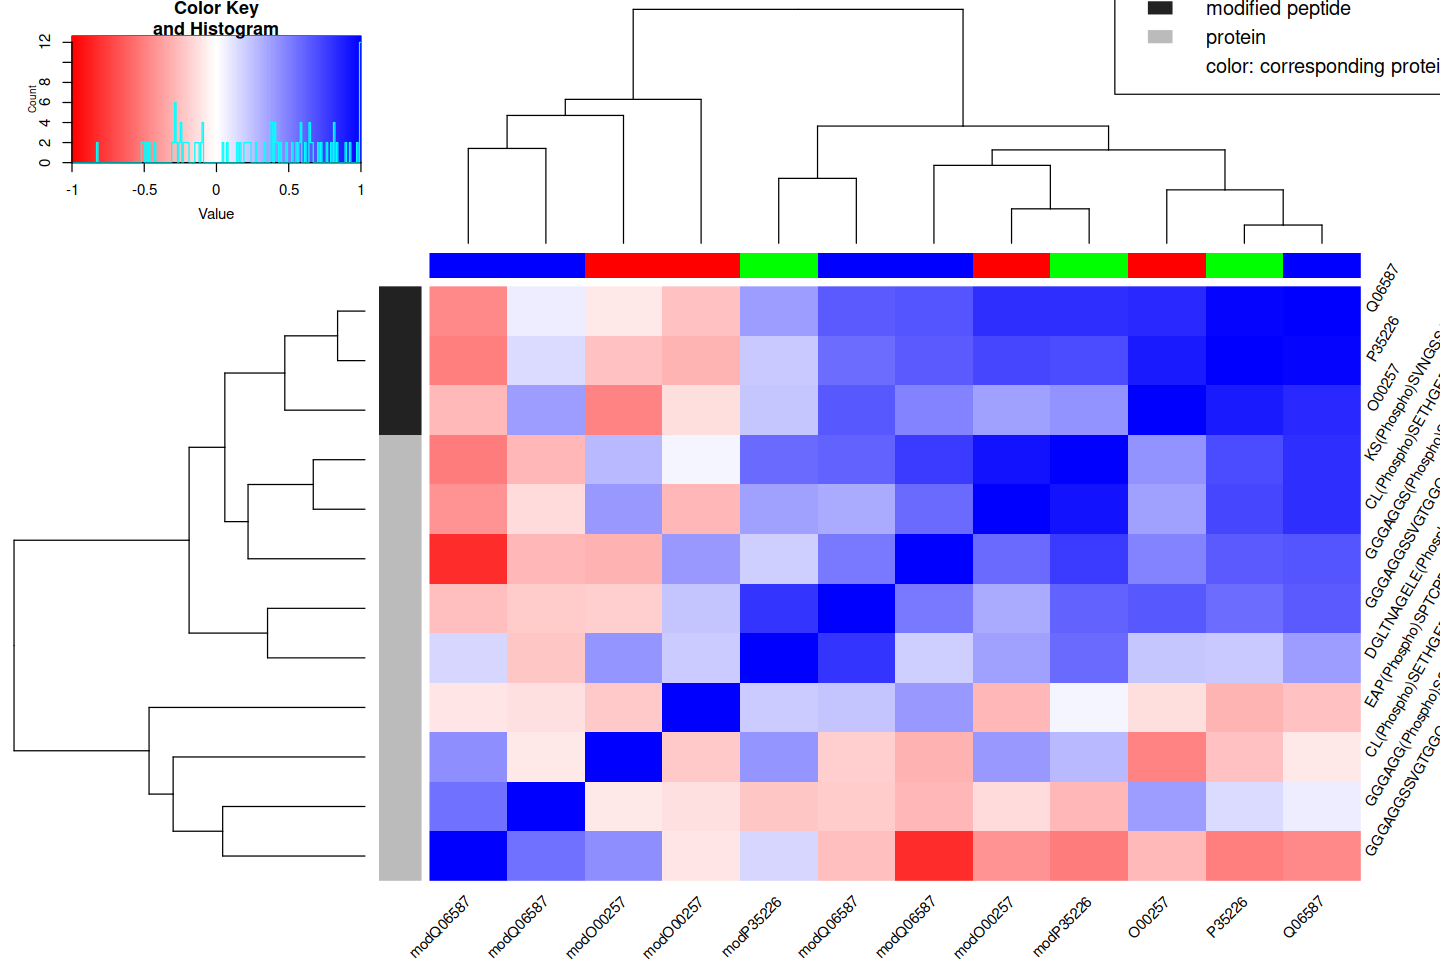

In [12]:
allprots <- c(rownames(avProts), ModPeps[,3])
print(avModPeps)
heatmap.2(cor(t(rbind(avProts,avModPeps))),symm = T,trace="none",labRow = c(rownames(avProts), rownames(avModPeps)),labCol = c(rownames(avProts), paste0("mod",ModPeps[,3])),
          breaks=seq(-1,1,0.01),col=redblue, RowSideColors=c(rep("#222222",nrow(avProts)), rep("#BBBBBB",nrow(avModPeps))),
          ColSideColors = rainbow(length(unique(allprots)))[as.factor(allprots)], srtCol = 45, offsetRow=-0.6, srtRow=60)
legend(0.8,1.2, fill=c("#222222","#BBBBBB","#FFFFFF"), legend = c("modified peptide", "protein", "color: corresponding protein"), border=0, cex=1, xpd=T)


#### Add your answers here
(double-click here to edit the cell)

##### ❔ Question I:  <ins>Do you see any particular trends for the modified peptides of the same protein?</ins>

_Answer_

##### ❔ Question II:  <ins>Which information in the plot do you find most interesting? And how much do you trust it to be true?</ins>

_Answer_




### Other complexes

👨‍💻 Now, select other complexes from the list below and run the workflow above again after changing the complex name when defining `cname`. Check whether there have been measured more than one proteins as it will fail otherwise.

Also try larger complexes like the ribosome and the proteasome.

👨‍💻 __Write down three main impression/results for each of the selected complexes__. Read about the complex in the literature and/or on CORUM and UniProt.

_Answers:_

Complex name:<br/>
   Result 1: <br/>
   Result 2: <br/>
   Result 3: <br/>
   
Complex name:<br/>
   Result 1: <br/>
   Result 2: <br/>
   Result 3: <br/>

Complex name:<br/>
   Result 1: <br/>
   Result 2: <br/>
   Result 3: <br/>


In [50]:
print(sort(names(complexes)))




   [1] "(E.F.G) complex"                                                                                                                                            
   [2] "12S U11 snRNP"                                                                                                                                              
   [3] "14-3-3 gamma-CXCR2 complex, unstimulated"                                                                                                                   
   [4] "17S U2 snRNP"                                                                                                                                               
   [5] "18S U11/U12 snRNP"                                                                                                                                          
   [6] "20S methylosome and RG-containing Sm protein complex"                                                                                                       
   [7] "20